In [2]:
# extraído de: https://github.com/helenaEH/SHAP_tutorial/blob/master/SHAP_final.ipynb

# SHAP (SHapley Additive exPlanations)
#### Using SHAP to see feature contribution to the target variable
Works with any sklear tree-based model & XGBoost, LightGBM, CatBoost

Library documentation:   
https://shap.readthedocs.io/en/latest/  
https://github.com/slundberg/shap#citations

In [ ]:
!pip install shap

In [7]:
import shap
import pandas as pd 
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

### Load data into dataframe

In [8]:
housing = fetch_california_housing()

# Create a Pandas dataframe with all the features
X = pd.DataFrame(data = housing['data'], columns = housing['feature_names'])
y = housing['target']

In [10]:
# Selecionando um subset dos dados, para rodar mais rápido!
X = X.iloc[0:2000]
y = y[0:2000]

In [24]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Random Forest 

In [12]:
# Split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [13]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(Xtrain, ytrain)

RandomForestRegressor()

In [14]:
rf_train = rf_reg.score(Xtrain, ytrain)
rf_cv = cross_val_score(rf_reg, Xtrain, ytrain, cv=5).mean()
rf_test = rf_reg.score(Xtest, ytest)
print('Evaluation of the Random Forest performance\n')
print(f'Training score: {rf_train.round(4)}')
print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score: {rf_test.round(4)}')

Evaluation of the Random Forest performance

Training score: 0.9718
Cross validation score: 0.7877
Test score: 0.816


### SHAP values

In [15]:
# Initialize JavaScript visualization
shap.initjs()

In [16]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X)

In [17]:
# shap force plot for the first prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [18]:
# SHAP values for all predictions
shap.force_plot(explainer.expected_value, shap_values, X)

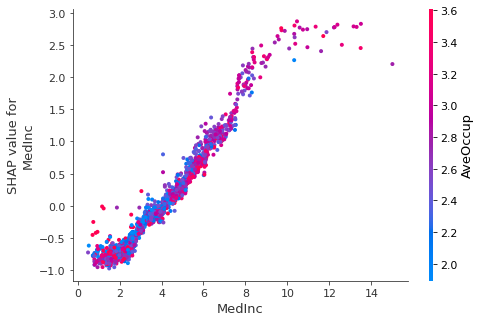

In [20]:
# Effect of a single feature on the shap value,and automatically selected other feature to show dependence 
shap.dependence_plot('MedInc', shap_values, X)

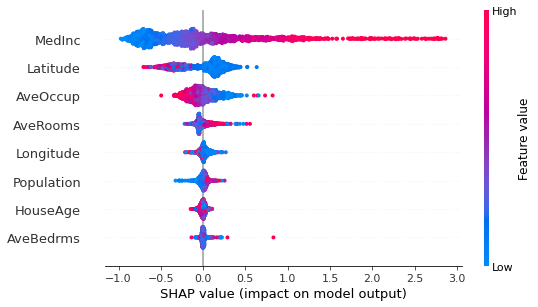

In [21]:
# See how every feaure contributes to the model output
shap.summary_plot(shap_values, X)

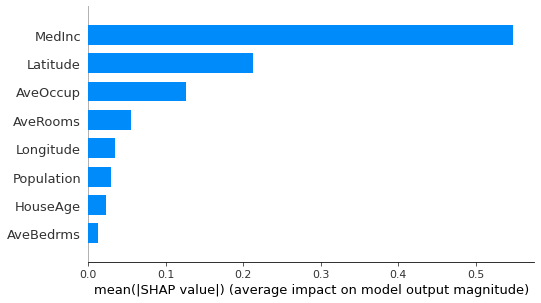

In [22]:
shap.summary_plot(shap_values, X, plot_type="bar")